2.3.9
# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


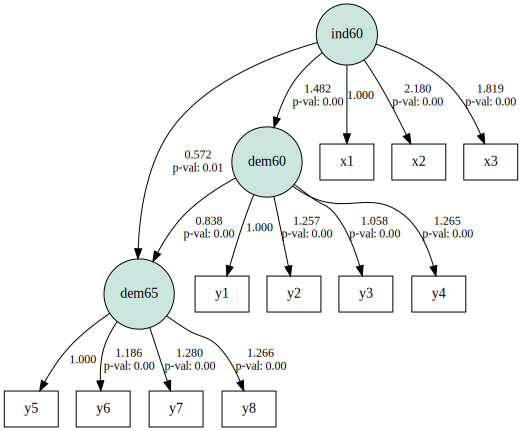

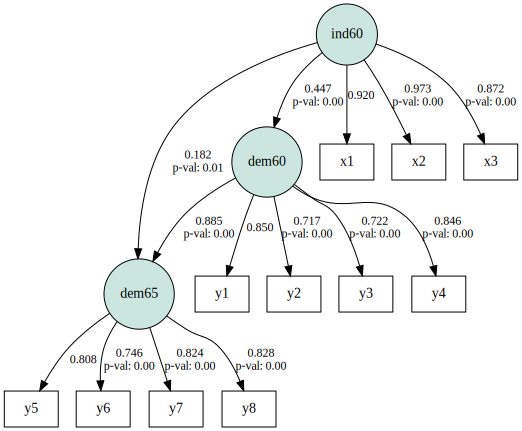

In [1]:
#### semopy ####
import numpy as np
import scipy
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
import sklearn
import semopy
jpn_fonts=list(np.sort([ttf for ttf in fm.findSystemFonts() if 'msgothic' in ttf]))
jpn_font=jpn_fonts[0]
prop = fm.FontProperties(fname=jpn_font)
sns.set()
print(semopy.__version__)
# > 2.3.9

# データ読み込み
data = semopy.examples.political_democracy.get_data()

# パス図定義
desc = semopy.examples.political_democracy.get_model()
print(desc)
'''
# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8
'''

# モデル作成
model = semopy.Model(desc)
model.fit(data)

# 結果テキスト表示
#display(model.inspect(std_est=True))
# 適合度表示
#display(semopy.calc_stats(model))

# 非標準化係数のパス図可視化
g = semopy.semplot(model, "tmp.png", plot_covs=False)
display(g)

# 標準化係数のパス図可視化
g = semopy.semplot(model, "tmp.png", plot_covs=False, std_ests=True)
display(g)

In [2]:
display(semopy.calc_stats(model))

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,35,55,38.125446,0.329171,730.654577,0.995374,0.94782,0.918003,0.94782,0.992731,0.034738,60.983321,132.825453,0.508339


In [3]:
display(model.inspect(std_est=True))

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,dem60,~,ind60,1.482379,0.446751,0.399024,3.715017,0.000203
1,dem65,~,ind60,0.571912,0.182178,0.221383,2.583364,0.009784
2,dem65,~,dem60,0.837574,0.885286,0.098446,8.507992,0.0
3,x1,~,ind60,1.000000,0.919814,-,-,-
4,x2,~,ind60,2.180494,0.973010,0.138565,15.736254,0.0
5,x3,~,ind60,1.818546,0.872109,0.151993,11.96465,0.0
6,y1,~,dem60,1.000000,0.850193,-,-,-
7,y2,~,dem60,1.256819,0.716628,0.182687,6.879647,0.0
8,y3,~,dem60,1.058174,0.722308,0.151521,6.983699,0.0
9,y4,~,dem60,1.265186,0.845633,0.145151,8.716344,0.0


# MMM

In [4]:
import numpy as np
import scipy
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
import sklearn
import semopy
jpn_fonts=list(np.sort([ttf for ttf in fm.findSystemFonts() if 'msgothic' in ttf]))
jpn_font=jpn_fonts[0]
prop = fm.FontProperties(fname=jpn_font)
sns.set()
print(semopy.__version__)
# > 2.3.9

mmmDf = pd.read_csv('dt_simulated_weekly.csv').iloc[:,1:]
mmmDf['DATE'] = pd.to_datetime(mmmDf['DATE'])
display(mmmDf)

2.3.9


,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,167687.6,0,95463.666667,7.290385e+07,0.000000,0,8125009,228213.987444,na,19401.653846
1,2015-11-30,2.584277e+06,214600.9,0,0.000000,1.658110e+07,29511.715457,31000,7901549,34258.573511,na,14791.000000
2,2015-12-07,2.547387e+06,0.0,248022,3404.000000,4.995477e+07,36132.358958,28400,8300197,127691.261335,na,14544.000000
3,2015-12-14,2.875220e+06,625877.3,0,132600.000000,3.164930e+07,36804.210958,31900,8122883,84014.720306,na,2800.000000
4,2015-12-21,2.215953e+06,0.0,520005,0.000000,8.802269e+06,28401.744069,27100,7105985,20687.478156,na,15478.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
203,2019-10-14,2.456240e+06,0.0,60433,153723.666667,0.000000e+00,152840.323412,112100,7612762,0.000000,na,28157.000000
204,2019-10-21,2.182825e+06,154917.6,0,0.000000,5.688196e+07,103680.047821,103700,6701667,133624.575524,na,10644.000000
205,2019-10-28,2.377707e+06,21982.5,14094,17476.000000,0.000000e+00,138387.704138,114700,7688920,0.000000,na,9597.000000
206,2019-11-04,2.732825e+06,22453.0,0,24051.333333,0.000000e+00,151707.990462,134100,8815710,0.000000,na,90189.000000


In [5]:
# 残存効果を計算する関数
def residual_effect(df, col_list, eta = 0.8, date='DATE'):
    '''
    At=Tt+λAt−1
    '''
    data = df.copy()
    for col in col_list:
        data[col+'_ResEf']=data[col]
        dataRE=data[col+'_ResEf'].copy()
        Yb = 0
        tmp = []
        for val in dataRE:
            tmp.append(val+eta*Yb)
            Yb = val+eta*Yb
        data[col+'_ResEf']=tmp
    return data

In [22]:
'''import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL #STL分解
sm.graphics.tsa.plot_acf(mmmDf['revenue'].to_numpy(), lags=55)
# STL分解
stl=STL(mmmDf['revenue'].to_numpy(), period=round(365/7), robust=True)
stl_series = stl.fit()
# STL分解結果のグラフ化
stl_series.plot()
plt.show()
# STL分解結果のデータ
stl_o = stl_series.observed #観測データ（STL分解前の元のデータ）＝トレンド＋季節性＋残差
stl_t = stl_series.trend    #トレンド（trend）
stl_s = stl_series.seasonal #季節性（seasonal）
stl_r = stl_series.resid    #残差（resid）

mmmDf['trend'] = stl_t
mmmDf['seasonal'] = stl_s
#mmmDf['resid'] = stl_r'''

"import statsmodels.api as sm\nfrom statsmodels.tsa.seasonal import STL #STL分解\nsm.graphics.tsa.plot_acf(mmmDf['revenue'].to_numpy(), lags=55)\n# STL分解\nstl=STL(mmmDf['revenue'].to_numpy(), period=round(365/7), robust=True)\nstl_series = stl.fit()\n# STL分解結果のグラフ化\nstl_series.plot()\nplt.show()\n# STL分解結果のデータ\nstl_o = stl_series.observed #観測データ（STL分解前の元のデータ）＝トレンド＋季節性＋残差\nstl_t = stl_series.trend    #トレンド（trend）\nstl_s = stl_series.seasonal #季節性（seasonal）\nstl_r = stl_series.resid    #残差（resid）\n\nmmmDf['trend'] = stl_t\nmmmDf['seasonal'] = stl_s\n#mmmDf['resid'] = stl_r"

0.73 0.45857016897422875


,DATE,revenue,competitor_sales_B,newsletter,facebook_I,search_clicks_P,tv_S_ResEf,ooh_S_ResEf,print_S_ResEf,facebook_S_ResEf,search_S_ResEf
0,2015-11-23,2.754372e+06,8125009,19401.653846,7.290385e+07,0.000000,167687.600000,0.000000,95463.666667,228213.987444,0.000000
1,2015-11-30,2.584277e+06,7901549,14791.000000,1.658110e+07,29511.715457,337012.848000,0.000000,69688.476667,200854.784345,31000.000000
2,2015-12-07,2.547387e+06,8300197,14544.000000,4.995477e+07,36132.358958,246019.379040,248022.000000,54276.587967,274315.253907,51030.000000
3,2015-12-14,2.875220e+06,8122883,2800.000000,3.164930e+07,36804.210958,805471.446699,181056.060000,172221.909216,284264.855657,69151.900000
4,2015-12-21,2.215953e+06,7105985,15478.000000,8.802269e+06,28401.744069,587994.156090,652175.923800,125721.993727,228200.822786,77580.887000
...,...,...,...,...,...,...,...,...,...,...,...
203,2019-10-14,2.456240e+06,7612762,28157.000000,0.000000e+00,152840.323412,270954.259558,115718.354554,280870.542282,378883.107370,390756.818679
204,2019-10-21,2.182825e+06,6701667,10644.000000,5.688196e+07,103680.047821,352714.209477,84474.398824,205035.495866,410209.243904,388952.477635
205,2019-10-28,2.377707e+06,7688920,9597.000000,0.000000e+00,138387.704138,279463.872918,75760.311142,167151.911982,299452.748050,398635.308674
206,2019-11-04,2.732825e+06,8815710,90189.000000,0.000000e+00,151707.990462,226461.627230,55305.027133,146072.229080,218600.506076,425103.775332


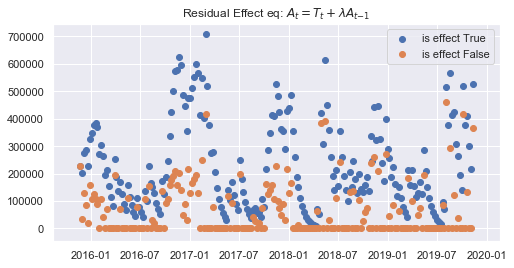

In [6]:
col_list = ["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"] # 広告系変数

cr = 0 # 相関係数
date='DATE'
# 売り上げ変数
obj_col = 'revenue'
# 忘却率を0.1から1まで21通り設定して、
# 残存効果を考慮した各広告系変数と売り上げ(revenue)の相関係数の平均が高くなる忘却率を選択
for eta in np.linspace(0.1,1,21):
    # 残存効果計算
    mmmDfResEf = residual_effect(mmmDf, col_list, eta = eta, date='DATE')#[[obj_col]+col_list]
    # 残存効果計算後の変数名抽出
    exp_col = [c for c in mmmDfResEf.columns if '_ResEf' in c]
    # 売り上げ(revenue)と残存効果計算後の変数のdf
    mmmDfResEf = mmmDfResEf[[date, obj_col, 'newsletter']+exp_col]
    # 売り上げ(revenue)変数と残存効果計算後の変数の相関係数計算して平均を取る
    # 前のcrより高ければ忘却率とcrを更新
    if mmmDfResEf.corr().iloc[2:,0].mean()>cr:
        etaans = eta
        cr = mmmDfResEf.corr().iloc[2:,0].mean()
print(etaans, cr)
# 最も相関が高かった忘却率で残存効果再計算
mmmDfResEf = residual_effect(mmmDf, col_list, eta = etaans, date='DATE')
exp_col = [c for c in mmmDfResEf.columns if '_ResEf' in c]
mmmDfResEf = mmmDfResEf[[date, obj_col, 'competitor_sales_B', 'newsletter', 'facebook_I', 'search_clicks_P']+exp_col]
display(mmmDfResEf)
# 残存効果計算前と計算後の'facebook_I_ResEf'の結果プロット
fig = plt.figure(figsize=(8,4))
plt.scatter(mmmDfResEf[date], mmmDfResEf['facebook_S_ResEf'], label='is effect True')
plt.scatter(mmmDfResEf[date], mmmDf['facebook_S'], label='is effect False')
plt.title("Residual Effect eq: $A_{t}=T_{t}+λA_{t−1}$")
plt.legend()
plt.show()

In [7]:
# 標準化はしない
#mmmDfResEf_std = (mmmDfResEf.iloc[:,1:]-mmmDfResEf.iloc[:,1:].mean())/mmmDfResEf.iloc[:,1:].std()
mmmDfResEf_std = mmmDfResEf.iloc[:,1:].copy()
mmmDfResEf_std.insert(0, 'DATE', mmmDfResEf.DATE)
display(mmmDfResEf_std)

,DATE,revenue,competitor_sales_B,newsletter,facebook_I,search_clicks_P,tv_S_ResEf,ooh_S_ResEf,print_S_ResEf,facebook_S_ResEf,search_S_ResEf
0,2015-11-23,2.754372e+06,8125009,19401.653846,7.290385e+07,0.000000,167687.600000,0.000000,95463.666667,228213.987444,0.000000
1,2015-11-30,2.584277e+06,7901549,14791.000000,1.658110e+07,29511.715457,337012.848000,0.000000,69688.476667,200854.784345,31000.000000
2,2015-12-07,2.547387e+06,8300197,14544.000000,4.995477e+07,36132.358958,246019.379040,248022.000000,54276.587967,274315.253907,51030.000000
3,2015-12-14,2.875220e+06,8122883,2800.000000,3.164930e+07,36804.210958,805471.446699,181056.060000,172221.909216,284264.855657,69151.900000
4,2015-12-21,2.215953e+06,7105985,15478.000000,8.802269e+06,28401.744069,587994.156090,652175.923800,125721.993727,228200.822786,77580.887000
...,...,...,...,...,...,...,...,...,...,...,...
203,2019-10-14,2.456240e+06,7612762,28157.000000,0.000000e+00,152840.323412,270954.259558,115718.354554,280870.542282,378883.107370,390756.818679
204,2019-10-21,2.182825e+06,6701667,10644.000000,5.688196e+07,103680.047821,352714.209477,84474.398824,205035.495866,410209.243904,388952.477635
205,2019-10-28,2.377707e+06,7688920,9597.000000,0.000000e+00,138387.704138,279463.872918,75760.311142,167151.911982,299452.748050,398635.308674
206,2019-11-04,2.732825e+06,8815710,90189.000000,0.000000e+00,151707.990462,226461.627230,55305.027133,146072.229080,218600.506076,425103.775332


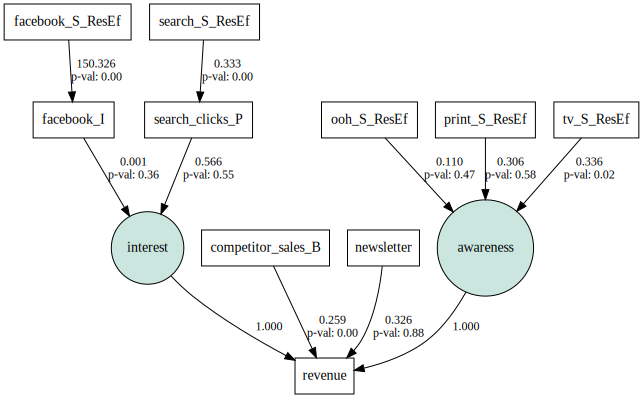

In [8]:
desc = \
'''
# regressions
revenue ~ competitor_sales_B
revenue ~ newsletter
facebook_I ~ facebook_S_ResEf
search_clicks_P ~ search_S_ResEf
interest ~ search_clicks_P + facebook_I
awareness ~ tv_S_ResEf + print_S_ResEf + ooh_S_ResEf

# Measurement part
awareness =~ revenue
interest =~ revenue

# residual correlations
facebook_S_ResEf ~~ search_S_ResEf
facebook_S_ResEf ~~ ooh_S_ResEf
facebook_S_ResEf ~~ print_S_ResEf
facebook_S_ResEf ~~ tv_S_ResEf
facebook_S_ResEf ~~ newsletter
facebook_S_ResEf ~~ competitor_sales_B
search_S_ResEf ~~ ooh_S_ResEf
search_S_ResEf ~~ print_S_ResEf
search_S_ResEf ~~ tv_S_ResEf
search_S_ResEf ~~ newsletter
search_S_ResEf ~~ competitor_sales_B
ooh_S_ResEf ~~ print_S_ResEf
ooh_S_ResEf ~~ tv_S_ResEf
ooh_S_ResEf ~~ newsletter
ooh_S_ResEf ~~ competitor_sales_B
print_S_ResEf ~~ tv_S_ResEf
print_S_ResEf ~~ newsletter
print_S_ResEf ~~ competitor_sales_B
newsletter ~~ competitor_sales_B
'''
# モデル作成
model = semopy.Model(desc)
model.fit(mmmDfResEf_std.iloc[:,1:])
g = semopy.semplot(model, "tmp.png", plot_covs=False)
display(g)
# display(semopy.calc_stats(model).T) # 適合度見られる

In [9]:
pd.options.display.float_format = '{:.4f}'.format
display(semopy.calc_stats(model).T)

,Value
DoF,22.0000
DoF Baseline,52.0000
chi2,164.8181
chi2 p-value,0.0000
chi2 Baseline,1456.4158
CFI,0.8983
GFI,0.8868
AGFI,0.7325
NFI,0.8868
TLI,0.7596


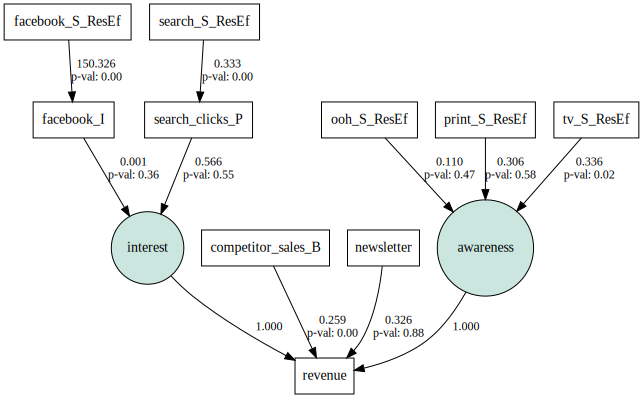

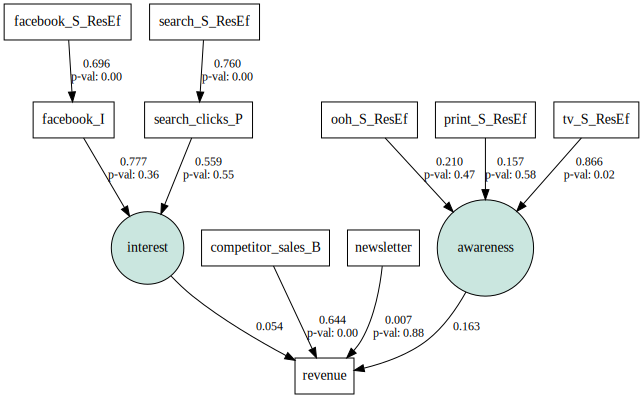

In [10]:
g = semopy.semplot(model, "tmp.png", plot_covs=False)
#print(g)
display(g)

g = semopy.semplot(model, "tmp.png", plot_covs=False, std_ests=True)
#print(g)
display(g)

,revenue,competitor_sales_B,facebook_I,facebook_S_ResEf,newsletter,ooh_S_ResEf,print_S_ResEf,search_S_ResEf,search_clicks_P,tv_S_ResEf
0,2272429.4169,8125009.0000,72903852.7126,228213.9874,19401.6538,0.0000,95463.6667,0.0000,0.0000,167687.6000
1,2221774.7738,7901549.0000,16581099.5453,200854.7843,14791.0000,0.0000,69688.4767,31000.0000,29511.7155,337012.8480
2,2354580.1082,8300197.0000,49954773.6705,274315.2539,14544.0000,248022.0000,54276.5880,51030.0000,36132.3590,246019.3790
3,2503231.0295,8122883.0000,31649297.0288,284264.8557,2800.0000,181056.0600,172221.9092,69151.9000,36804.2110,805471.4467
4,2180502.6536,7105985.0000,8802269.4788,228200.8228,15478.0000,652175.9238,125721.9937,77580.8870,28401.7441,587994.1561
...,...,...,...,...,...,...,...,...,...,...
203,2259474.8226,7612762.0000,0.0000,378883.1074,28157.0000,115718.3546,280870.5423,390756.8187,152840.3234,270954.2596
204,2047929.8623,6701667.0000,56881962.2352,410209.2439,10644.0000,84474.3988,205035.4959,388952.4776,103680.0478,352714.2095
205,2228650.3665,7688920.0000,0.0000,299452.7480,9597.0000,75760.3111,167151.9120,398635.3087,138387.7041,279463.8729
206,2528192.4467,8815710.0000,0.0000,218600.5061,90189.0000,55305.0271,146072.2291,425103.7753,151707.9905,226461.6272


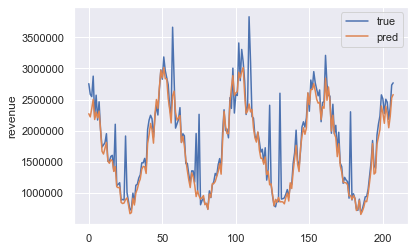

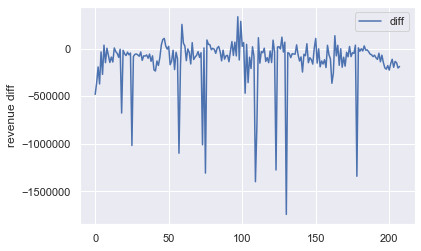

In [11]:
# 実測
true = mmmDfResEf['revenue']
# 予測
pred = model.predict(mmmDfResEf_std.iloc[:,2:])
display(pred) # 返される結果
# 標準化を戻す
pred = (pred['revenue'])#*mmmDfResEf.iloc[:,1].std())+mmmDfResEf.iloc[:,1].mean()

# 実測と予測プロット
plt.plot(true, label='true')
plt.plot(pred, label='pred')
plt.legend()
plt.ylabel('revenue')
#plt.ylim(0,)
plt.show()

# 予実差プロット
plt.plot(pred-true, label='diff')
plt.legend()
plt.ylabel('revenue diff')
#plt.ylim(-1900000,1900000)
plt.show()

In [12]:
# 変数名定義
cols = ['competitor_sales_B','newsletter','tv_S_ResEf','print_S_ResEf','ooh_S_ResEf','search_S_ResEf','facebook_S_ResEf']
# 出力
ins = model.inspect(std_est=True)
display(ins)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,facebook_I,~,facebook_S_ResEf,150.3257,0.6965,10.7396,13.9974,0.0000
1,search_clicks_P,~,search_S_ResEf,0.3329,0.7598,0.0198,16.8526,0.0000
2,interest,~,search_clicks_P,0.5659,0.5591,0.9379,0.6034,0.5462
3,interest,~,facebook_I,0.0010,0.7768,0.0011,0.9240,0.3555
4,awareness,~,tv_S_ResEf,0.3358,0.8658,0.1389,2.4182,0.0156
5,awareness,~,print_S_ResEf,0.3059,0.1569,0.5482,0.5581,0.5768
6,awareness,~,ooh_S_ResEf,0.1102,0.2101,0.1519,0.7256,0.4681
7,revenue,~,competitor_sales_B,0.2593,0.6442,0.0269,9.6571,0.0000
8,revenue,~,newsletter,0.3264,0.0075,2.2184,0.1472,0.8830
9,revenue,~,awareness,1.0000,0.1632,-,-,-


In [13]:
def path_summary(ins_org, colname, objcol='revenue', epoch=10000):
    ins = ins_org[ins_org['op']!='~~'].copy()
    phase_list = []
    # 起点から終点までの経由ノード数をepoch数分回してdfを作る
    for step in range(epoch):
        # step=0の時、'rval'!='lval'のdf[['rval', 'lval', 'Estimate']]をリストに入れる
        if step==0:
            phase_list.append(ins[(ins['rval']==colname)&(ins['rval']!=ins['lval'])][['rval', 'lval', 'Estimate']])
            
        # step>0の時
        else:
            # phase_listの最後のdfの行数が1のとき、
            # かつそのdfの'lval'にobjcolがある時、ループ終了
            if len(phase_list[-1])==1 and objcol in phase_list[-1]['lval']:
                break
            # phase_listの最後のdfの行数が0のとき、削除してループ終了
            elif len(phase_list[-1])==0:
                phase_list.pop(-1)
                break
            # phase_listの最後のdfの'lval'と同じ変数が'rval'にあり、
            # 'rval'!='lval'である結果を抽出
            else:
                phase_list.append(ins[(ins['rval'].isin(phase_list[-1]['lval']))\
                                      &(ins['rval']!=ins['lval'])
                                     ][['rval', 'lval', 'Estimate']]
                                 )
    # phase_listが空の時例外
    if len(phase_list)==0:
        raise Exception
    # phase_listのdfそれぞれを処理して起点→中間→終点のパス図を表にまとめる
    for i in range(len(phase_list)):
        # phase_listの中身が1のとき、そのまま定義して終了
        if len(phase_list)==1:
            phase = phase_list[0].rename(columns={'Estimate':'Estimate'+str(i+1)})
            break
            
        # 0番目の処理はスキップ
        if i==0:
            continue
        # 1番目の処理=0番目のdfと1番目のdfを'lval'と'rval'マージしてphaseと定義
        elif i==1:
            phase = pd.merge(phase_list[i-1].rename(columns={'lval':'middle'+str(i),'Estimate':'Estimate'+str(i)})
                             , phase_list[i].rename(columns={'rval':'middle'+str(i),'Estimate':'Estimate'+str(i+1)})
                             , on=['middle'+str(i)]
                             , how='left')
            #display(phase)
        # 以降の処理=前回のphaseとi番目のdfを'lval'と'rval'マージしてphaseと定義
        else:
            phase = pd.merge(phase.rename(columns={'lval':'middle'+str(i),'Estimate':'Estimate'+str(i)})
                             , phase_list[i].rename(columns={'rval':'middle'+str(i),'Estimate':'Estimate'+str(i+1)})
                             , on=['middle'+str(i)]
                             , how='left')
            #display(phase)
    # カラムをrval→middle→lvalの順番に変更して係数をその右側に持ってくる
    colnode = [col for col in phase.columns if 'middle' in col]
    colesti = [col for col in phase.columns if 'Estimate' in col]
    phase = phase[['rval']+colnode+['lval']+colesti]
    return phase

In [14]:
# 目的変数
objcol='revenue'
# 観測変数ごとに処理を実施してconcat
summaries = [path_summary(ins, col, objcol=objcol, epoch=10000) for col in cols]
summaries = pd.concat(summaries)
# ノード名のカラム名と、係数のカラム名をそれぞれ取得
colnode = [col for col in summaries.columns if 'middle' in col]
colesti = [col for col in summaries.columns if 'Estimate' in col]
# 起点ノード→中間ノード→・・・→終点ノードという形で係数をまとめるデータフレーム
summaries = summaries[['rval']+colnode+['lval']+colesti].reset_index(drop=True)
display(summaries)

,rval,middle1,middle2,lval,Estimate1,Estimate2,Estimate3
0,competitor_sales_B,NaN,NaN,revenue,0.2593,NaN,NaN
1,newsletter,NaN,NaN,revenue,0.3264,NaN,NaN
2,tv_S_ResEf,awareness,NaN,revenue,0.3358,1.0000,NaN
3,print_S_ResEf,awareness,NaN,revenue,0.3059,1.0000,NaN
4,ooh_S_ResEf,awareness,NaN,revenue,0.1102,1.0000,NaN
5,search_S_ResEf,search_clicks_P,interest,revenue,0.3329,0.5659,1.0000
6,facebook_S_ResEf,facebook_I,interest,revenue,150.3257,0.0010,1.0000


In [15]:
# 結果を入れる箱
objcolDf_list = []
# 'rval'、middle、'lval'のカラムを取ってくる
for col in ['rval']+colnode+['lval']:
    # colの行にobjcolがある行を抽出
    objcolDf = summaries[summaries[col].isin([objcol])].copy()
    # objcolDfが存在していたら、
    # objcolまでの係数をかけ算(objcol直通なら直接効果、経由地があれば間接効果)
    if len(objcolDf)>0:
        # ['rval', col]とEstimateだけ抜き出し、colは'lval'に名前変更
        objcolDf = objcolDf[['rval', col]+colesti].drop_duplicates().rename(columns={col:'lval'})
        # objcolまでの係数をかけ算
        objcolDf['Effect'] = objcolDf.prod(axis=1, numeric_only=True).to_numpy()
        objcolDf_list.append(objcolDf[['rval', 'lval', 'Effect']])
# 観測変数ごとに直接効果、間接効果を計算できたので足し合わせて総合効果とする
objcolDf = pd.concat(objcolDf_list).reset_index(drop=True)
objcolDf = objcolDf.groupby(['rval', 'lval'])[['Effect']].sum().reset_index().rename(columns={'Effect':'TotalEffect'})
display(objcolDf)

,rval,lval,TotalEffect
0,competitor_sales_B,revenue,0.2593
1,facebook_S_ResEf,revenue,0.1518
2,newsletter,revenue,0.3264
3,ooh_S_ResEf,revenue,0.1102
4,print_S_ResEf,revenue,0.3059
5,search_S_ResEf,revenue,0.1884
6,tv_S_ResEf,revenue,0.3358


In [16]:
# 可視化用のデータ加工
dates = mmmDfResEf_std.DATE.to_numpy() # Date
labels = list(np.sort(mmmDfResEf_std[cols].T.index)) # ラベル名(変数名でソート)
vals = mmmDfResEf_std[cols].T.sort_index().T.to_numpy() # カラムの並びをソートして配列化
coeffi = objcolDf[['rval', 'TotalEffect']].sort_values('rval')['TotalEffect'].to_numpy() # rvalでソートして総合効果を配列化
stacks = (vals*coeffi) # 変数×総合効果
stacks100 = (stacks/stacks.sum(axis=1).reshape(-1,1)) # 変数×総合効果の比率（貢献度）
stacksSum = stacks.sum(axis=1) # 変数×総合効果の合計=売り上げの予測値
print('"dates" shape: ', dates.shape)
print('"labels" length: ', len(labels))
print('"coeffi" shape: ', coeffi.shape)
print('"stacks" shape: ', stacks.shape)
print('"stacks100" shape: ', stacks100.shape)
print('"stacksSum" shape: ', stacksSum.shape)

"dates" shape:  (208,)
"labels" length:  7
"coeffi" shape:  (7,)
"stacks" shape:  (208, 7)
"stacks100" shape:  (208, 7)
"stacksSum" shape:  (208,)


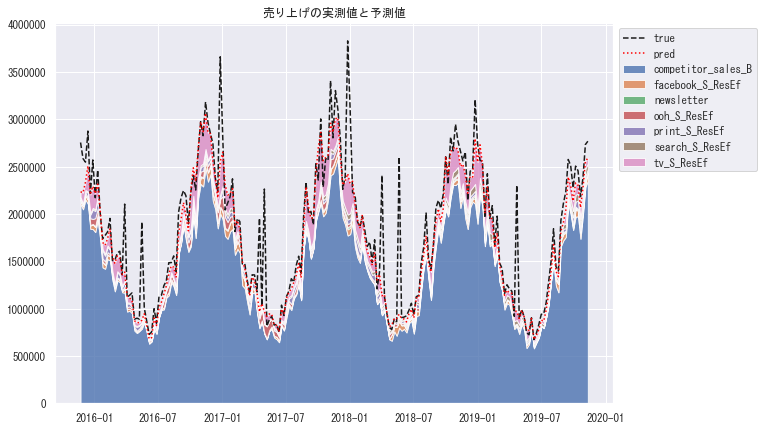

In [17]:
# 可視化
fig = plt.figure(figsize=(10,7))
plt.rcParams['font.family'] = prop.get_name()
# 売り上げの実測値プロット
plt.plot(dates, mmmDfResEf_std.revenue.to_numpy(), label='true', c='k', ls='--')
# 売り上げの予測値プロット
plt.plot(dates, stacksSum
         , label='pred', c='red', ls=':')
# 売り上げの予測値を変数ごとに分解して積み上げ面グラフに
plt.stackplot(dates, stacks.T, labels=labels, alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('売り上げの実測値と予測値')
plt.show()

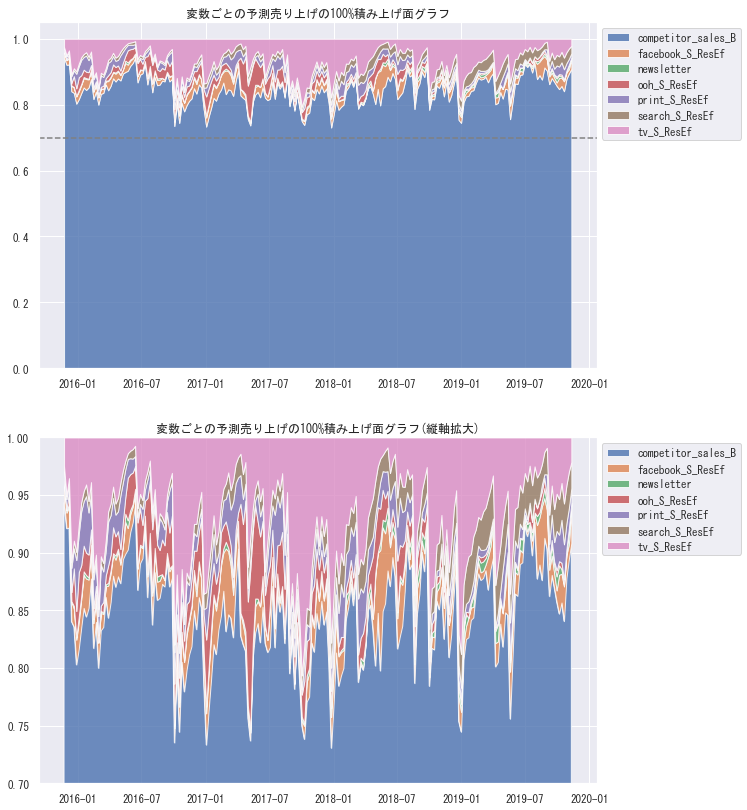

In [18]:
# 売り上げの予測値を変数ごとに分解して100%積み上げ面グラフに
fig = plt.figure(figsize=(10,14))
plt.rcParams['font.family'] = prop.get_name()
ax1 = plt.subplot(2,1,1)
ax1.stackplot(dates, stacks100.T, labels=labels, alpha=0.8)
ax1.axhline(y=0.7, c='gray', ls='--')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_title('変数ごとの予測売り上げの100%積み上げ面グラフ')

# 売り上げの予測値を変数ごとに分解して100%積み上げ面グラフに(縦軸拡大)
ax2 = plt.subplot(2,1,2)
ax2.stackplot(dates, stacks100.T, labels=labels, alpha=0.8)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_ylim(0.7, 1)
ax2.set_title('変数ごとの予測売り上げの100%積み上げ面グラフ(縦軸拡大)')
plt.show()

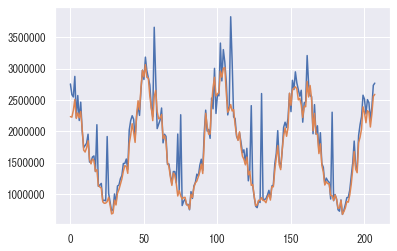

In [19]:
plt.plot(mmmDfResEf_std.revenue)
plt.plot((vals*coeffi).sum(axis=1))

In [20]:
#### python ####
import numpy as np
import scipy
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
import sklearn
import semopy
import graphviz
jpn_fonts=list(np.sort([ttf for ttf in fm.findSystemFonts() if 'msgothic' in ttf]))
jpn_font=jpn_fonts[0]
prop = fm.FontProperties(fname=jpn_font)
sns.set()
print(semopy.__version__)

mmmDfResEf_stdGroup = pd.read_csv('HolzingerSwineford1939.csv')
display(mmmDfResEf_stdGroup)

2.3.9


,Unnamed: 0,id,sex,ageyr,agemo,school,grade,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,1,1,1,13,1,Pasteur,7.0000,3.3333,7.7500,0.3750,2.3333,5.7500,1.2857,3.3913,5.7500,6.3611
1,2,2,2,13,7,Pasteur,7.0000,5.3333,5.2500,2.1250,1.6667,3.0000,1.2857,3.7826,6.2500,7.9167
2,3,3,2,13,1,Pasteur,7.0000,4.5000,5.2500,1.8750,1.0000,1.7500,0.4286,3.2609,3.9000,4.4167
3,4,4,1,13,2,Pasteur,7.0000,5.3333,7.7500,3.0000,2.6667,4.5000,2.4286,3.0000,5.3000,4.8611
4,5,5,2,12,2,Pasteur,7.0000,4.8333,4.7500,0.8750,2.6667,4.0000,2.5714,3.6957,6.3000,5.9167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,297,346,1,13,5,Grant-White,8.0000,4.0000,7.0000,1.3750,2.6667,4.2500,1.0000,5.0870,5.6000,5.2500
297,298,347,2,14,10,Grant-White,8.0000,3.0000,6.0000,1.6250,2.3333,4.0000,1.0000,4.6087,6.0500,6.0833
298,299,348,2,14,3,Grant-White,8.0000,4.6667,5.5000,1.8750,3.6667,5.7500,4.2857,4.0000,6.0000,7.6111
299,300,349,1,14,2,Grant-White,8.0000,4.3333,6.7500,0.5000,3.6667,4.5000,2.0000,5.0870,6.2000,4.3889


In [21]:
desc = \
'''
visual =~ x1 + x2 + x3
textual =~ x4 + x5 + x6
speed =~ x7 + x8 + x9

visual ~~ textual
visual ~~ speed
textual ~~ speed
'''

In [22]:
# パス図、データ、母集団を示す変数、Modelインスタンスを入れる
res = semopy.multigroup.multigroup(desc, mmmDfResEf_stdGroup, 'school', mod=semopy.Model)
# 母集団ごとの結果を確認できる
for i in res.estimates.keys():
    print(i)
    inspection = res.estimates[i]
    display(inspection)

Pasteur


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,x1,~,visual,1.0000,-,-,-
1,x2,~,visual,0.3938,0.1222,3.2218,0.0013
2,x3,~,visual,0.5695,0.1397,4.0760,0.0000
3,x4,~,textual,1.0000,-,-,-
4,x5,~,textual,1.1834,0.1019,11.6123,0.0000
5,x6,~,textual,0.8750,0.0766,11.4206,0.0000
6,x7,~,speed,1.0000,-,-,-
7,x8,~,speed,1.1240,0.2770,4.0582,0.0000
8,x9,~,speed,0.9227,0.2248,4.1036,0.0000
9,visual,~~,textual,0.4792,0.1057,4.5315,0.0000


Grant-White


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,x1,~,visual,1.0000,-,-,-
1,x2,~,visual,0.7363,0.1547,4.7598,0.0000
2,x3,~,visual,0.9249,0.1657,5.5829,0.0000
3,x4,~,textual,1.0000,-,-,-
4,x5,~,textual,0.9897,0.0867,11.4150,0.0000
5,x6,~,textual,0.9631,0.0847,11.3725,0.0000
6,x7,~,speed,1.0000,-,-,-
7,x8,~,speed,1.2263,0.1867,6.5692,0.0000
8,x9,~,speed,1.0580,0.1646,6.4290,0.0000
9,visual,~~,textual,0.4075,0.0981,4.1526,0.0000


In [23]:
# multigroupのres.estimatesの結果をパス図として可視化する関数
def mySemplot(inspection, obs_cols, filename: str, plot_covs=False
              , plot_exos=True, engine='dot', latshape='circle'
              , plot_ests=True, std_ests=False, show=False):
    all_vars = np.unique(inspection.lval.to_list()+inspection.rval.to_list())
    exVar = [i for i in all_vars if i not in obs_cols]
    inVar = [i for i in all_vars if i in obs_cols]

    g = graphviz.Digraph('G', engine=engine)
    g.attr(overlap='scale', splines='true')
    g.attr('edge', fontsize='12')
    g.attr('node', shape=latshape, fillcolor='#cae6df', style='filled')

    for lat in exVar:
        g.node(lat, label=lat)

    g.attr('node', shape='box', style='')

    for obs in inVar:
        g.node(obs, label=obs)

    regr = inspection[inspection['op'] == '~']
    
    #try:
    #    exo_vars = mod.vars['observed_exogenous']
    #except KeyError:
    #    exo_vars = set()

    exo_vars = set()
    for _, row in regr.iterrows():
        lval, rval, est = row['lval'], row['rval'], row['Estimate']
        if (rval not in all_vars) or (~plot_exos and rval in exo_vars) or\
            (rval == '1'):
            continue
        if plot_ests:
            pval = row['p-value']
            label = '{:.3f}'.format(float(est))
            if pval !='-':
                label += r'\np-val: {:.2f}'.format(float(pval))
        else:
            label = str()
        g.edge(rval, lval, label=label)

    if plot_covs:
        covs = inspection[inspection['op'] == '~~']
        for _, row in covs.iterrows():
            lval, rval, est = row['lval'], row['rval'], row['Estimate']
            if lval == rval:
                continue
            if plot_ests:
                pval = row['p-value']
                label = '{:.3f}'.format(float(est))
                if pval !='-':
                    label += r'\np-val: {:.2f}'.format(float(pval))
            else:
                label = str()
            g.edge(rval, lval, label=label, dir='both', style='dashed')
    g.render(filename, view=show)
    return g

Pasteur


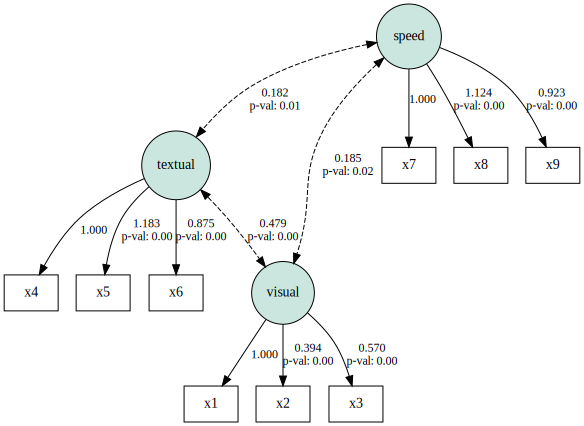

Grant-White


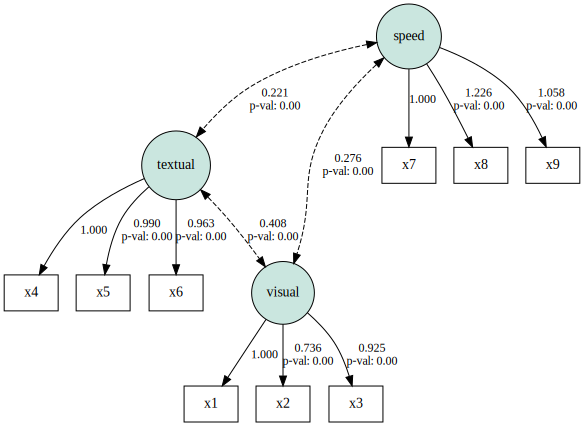

In [24]:
# パス図可視化
obs_cols = mmmDfResEf_stdGroup.columns.to_numpy() # 母集団名リスト
for i in res.estimates.keys():
    print(i)
    inspection = res.estimates[i]
    g = mySemplot(inspection, obs_cols, "tmp.png", plot_covs=True)#, engine='circo')
    display(g)

In [371]:
from semopy.examples import multivariate_regression
from semopy.means import estimate_means
from semopy import Model
#平均を分散分析後に推定する
desc = multivariate_regression.get_model()
data = multivariate_regression.get_data()

model = Model(desc)
model.fit(data)
print(estimate_means(model))
print(data.mean())

  lval op rval  Estimate
0   x1  ~    1  -0.04375
1   x2  ~    1   0.07370
2   x3  ~    1  -0.05671
3   y1  ~    1  -1.45662
4   y2  ~    1   0.92931
5   y3  ~    1   0.99204
y1   -1.46170
y2    1.10526
y3    1.10452
x1   -0.04375
x2    0.07370
x3   -0.05671
dtype: float64


In [372]:
from semopy.examples import multivariate_regression
from semopy import ModelMeans
#平均を分散分析と同時に推定する
desc = multivariate_regression.get_model()
data = multivariate_regression.get_data()

model = ModelMeans(desc)
model.fit(data)
print(model.inspect())
print(estimate_means(model))

   lval  op rval  Estimate  Std. Err   z-value  p-value
0    y1   ~   x1  -1.38972   0.07342 -18.92902  0.00000
1    y1   ~   x2  -1.13840   0.08797 -12.94138  0.00000
2    y1   ~   x3  -0.31795   0.07258  -4.38097  0.00001
3    y2   ~   x1  -0.74574   0.09797  -7.61197  0.00000
4    y2   ~   x2   1.07453   0.11738   9.15402  0.00000
5    y2   ~   x3  -1.13094   0.09685 -11.67761  0.00000
6    y3   ~   x1   0.70278   0.06427  10.93487  0.00000
7    y3   ~   x2   1.23505   0.07700  16.03853  0.00000
8    y3   ~   x3  -0.92045   0.06353 -14.48784  0.00000
9    y1   ~    1  -1.45662   0.08027 -18.14706  0.00000
10   y2   ~    1   0.92929   0.10711   8.67604  0.00000
11   y3   ~    1   0.99204   0.07027  14.11833  0.00000
12   y2  ~~   y2   1.13563   0.16060   7.07107  0.00000
13   y3  ~~   y3   0.48872   0.06912   7.07107  0.00000
14   y1  ~~   y1   0.63775   0.09019   7.07107  0.00000
  lval op rval  Estimate
0   y1  ~    1  -1.46170
1   y2  ~    1   1.10526
2   y3  ~    1   1.10452


In [376]:
from semopy.examples import multivariate_regression
from semopy import ModelMeans
#多母集団分析_固定効果
desc = multivariate_regression.get_model()
data = multivariate_regression.get_data()
data['group'] = 0
np.random.seed(10)
U =  np.array([np.random.normal(scale=1, size=1).flatten() for _ in range(3)])
data.iloc[0:25, 3] +=  U[0].flatten()
data.iloc[0:25, -1] = 0
data.iloc[25:50, 3] += U[1].flatten()
data.iloc[25:50, -1] = 1
data.iloc[50:75, 3] +=  U[2].flatten()
data.iloc[50:75, -1] = 2

mod = ModelMeans(desc)
mod.fit(data, groups=['group'])
display(mod.inspect())

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,y1,~,x1,-0.68450,0.09226,-7.41926,0.00000
1,y1,~,x2,-1.07700,0.15102,-7.13147,0.00000
2,y1,~,x3,-0.25150,0.12433,-2.02281,0.04309
3,y2,~,x1,-0.41280,0.07963,-5.18368,0.00000
4,y2,~,x2,1.08168,0.13035,8.29801,0.00000
5,y2,~,x3,-1.08772,0.10732,-10.13550,0.00000
6,y3,~,x1,0.33518,0.06161,5.44042,0.00000
7,y3,~,x2,1.20305,0.10085,11.92942,0.00000
8,y3,~,x3,-0.95305,0.08303,-11.47901,0.00000
9,y1,~,1,0.12098,0.13789,0.87734,0.38030


In [374]:
print(estimate_means(mod))

  lval op rval  Estimate
0   y1  ~    1  -0.00001
1   y2  ~    1  -0.00001
2   y3  ~    1  -0.00001


In [375]:
from semopy import ModelEffects
#多母集団分析_変量効果
m = ModelEffects(desc)
m.fit(data, group='group')
display(m.inspect())

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,y1,~,x1,-1.17765,0.08677,-13.57246,0.00000
1,y1,~,x2,-1.18535,0.11201,-10.58267,0.00000
2,y1,~,x3,-0.30642,0.09215,-3.32539,0.00088
3,y2,~,x1,-0.62095,0.09558,-6.49679,0.00000
4,y2,~,x2,1.03566,0.12338,8.39389,0.00000
5,y2,~,x3,-1.11719,0.10150,-11.00652,0.00000
6,y3,~,x1,0.60001,0.06554,9.15485,0.00000
7,y3,~,x2,1.26093,0.08461,14.90356,0.00000
8,y3,~,x3,-0.92990,0.06960,-13.36008,0.00000
9,y1,~,1,-1.45648,0.55482,-2.62513,0.00866


In [31]:
display(m.inspect(std_est=False))
display(m.inspect(std_est=True))

C:\Users\ryousuke.kiridoshi\Anaconda3\envs\yahtra\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,y,~,x1,1.929646,0.060973,31.647672,0.000000e+00
1,y,~,x2,6.032722,0.017584,343.084042,0.000000e+00
2,y,~,x3,-9.744755,0.112523,-86.602145,0.000000e+00
3,y,~,1,-0.367880,0.731561,-0.502869,6.150561e-01
4,y,~~,y,1.161328,0.166757,6.964200,3.302691e-12
5,y,RF,y,1.495266,1.252403,1.193918,2.325101e-01


,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,y,~,x1,1.929646,1.790607,0.060973,31.647672,0.000000e+00
1,y,~,x2,6.032722,5.598038,0.017584,343.084042,0.000000e+00
2,y,~,x3,-9.744755,-9.042604,0.112523,-86.602145,0.000000e+00
3,y,~,1,-0.367880,-0.341372,0.731561,-0.502869,6.150561e-01
4,y,~~,y,1.161328,1.000000,0.166757,6.964200,3.302691e-12
5,y,RF,y,1.495266,1.287548,1.252403,1.193918,2.325101e-01


In [7]:
from semopy.examples import multivariate_regression
from semopy import ModelMeans
import semopy.multigroup as multigroup
#母集団別分析
desc = multivariate_regression.get_model()
data = multivariate_regression.get_data()
data['group'] = 0
np.random.seed(10)
U =  np.array([np.random.normal(scale=1, size=1).flatten() for _ in range(3)])
data.iloc[0:25, 3] +=  U[0].flatten()
data.iloc[0:25, -1] = 0
data.iloc[25:50, 3] += U[1].flatten()
data.iloc[25:50, -1] = 1
data.iloc[50:75, 3] +=  U[2].flatten()
data.iloc[50:75, -1] = 2
res=multigroup.multigroup(desc, data, 'group', mod=Model)
for i in range(len(res.estimates)):
    print(i)
    display(res.estimates[i])

0


C:\Users\ryousuke.kiridoshi\Anaconda3\envs\yahtra\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,y,~,x1,1.933296,0.081245,23.796020,0.000000e+00
1,y,~,x2,6.064089,0.025389,238.843028,0.000000e+00
2,y,~,x3,-9.870985,0.156677,-63.002176,0.000000e+00
3,y,~~,y,1.161132,0.232226,5.000000,5.733031e-07


1


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,y,~,x1,1.744544,0.125983,13.847469,0.000000
1,y,~,x2,6.013292,0.027969,214.999892,0.000000
2,y,~,x3,-9.316966,0.196764,-47.350960,0.000000
3,y,~~,y,0.784858,0.221991,3.535534,0.000407


2


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,y,~,x1,1.958698,0.118043,16.593063,0.000000
1,y,~,x2,5.978082,0.033342,179.293377,0.000000
2,y,~,x3,-9.751128,0.232847,-41.877880,0.000000
3,y,~~,y,1.012595,0.286405,3.535534,0.000407


In [9]:
from semopy.examples import example_rf

desc = example_rf.get_model()
data, k = example_rf.get_data()

model = ModelEffects(desc)
model.fit(data, group='group', k=k)
print(model.inspect())

C:\Users\ryousuke.kiridoshi\Anaconda3\envs\yahtra\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



    lval  op  rval      Estimate  Std. Err      z-value      p-value
0   eta2   ~  eta1  2.935099e+00  0.221925      13.2256            0
1     y1   ~  eta1  1.000000e+00         -            -            -
2     y2   ~  eta1  3.068180e+00  0.227656      13.4772            0
3     y3   ~  eta2  1.000000e+00         -            -            -
4     y4   ~  eta2 -2.393876e-02   2.67944  -0.00893424     0.992872
5     x2   ~  eta1  2.127286e+00  0.170096      12.5064            0
6     x1   ~  eta1 -2.366370e+00  0.185133      -12.782            0
7     x2   ~     1  3.446386e-01  0.595695     0.578548     0.562894
8     x1   ~     1 -5.109161e-01  0.658444    -0.775944     0.437782
9     y1   ~     1  3.778841e-01  0.302045      1.25109     0.210903
10    y2   ~     1  6.741706e-01  0.841227     0.801413     0.422893
11    y3   ~     1  5.946468e-01  0.808897     0.735133     0.462259
12    y4   ~     1 -9.529392e-01   14.9495   -0.0637438     0.949174
13  eta2  ~~  eta2  2.409097e-15  